In [2]:
import scanpy as sc
import matplotlib as mpl

# 设置参数
mpl.rcParams["pdf.fonttype"] = 42  # 保留字体
sc.settings.verbosity = 4  # 输出细节
sc._settings.ScanpyConfig.n_jobs = -1  # 使用所有核心
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=600,
    facecolor="white",
    frameon=False,  # remove frame
)

In [3]:
adata = sc.read_h5ad("anndata_celltypist_anno.h5ad")

In [4]:
# 计算细胞周期得分前，你需要有一组细胞周期基因列表
# 这里是一个简化的示例，实际上你可能需要根据你的数据调整这些列表
s_genes = [
    "MCM5",
    "PCNA",
    "TYMS",
    "FEN1",
    "MCM2",
    "MCM4",
    "RRM1",
    "UNG",
    "GINS2",
    "MCM6",
    "CDCA7",
    "DTL",
    "PRIM1",
    "UHRF1",
    "HELLS",
    "RFC2",
    "RPA2",
    "NASP",
    "RAD51AP1",
    "GMNN",
    "WDR76",
    "SLBP",
    "CCNE2",
    "UBR7",
    "POLD3",
    "MSH2",
    "ATAD2",
    "RAD51",
    "RRM2",
    "CDC45",
    "CDC6",
    "EXO1",
    "TIPIN",
    "DSCC1",
    "BLM",
    "CASP8AP2",
    "USP1",
    "CLSPN",
    "POLA1",
    "CHAF1B",
    "BRIP1",
    "E2F8",
]
g2m_genes = [
    "HMGB2",
    "CDK1",
    "NUSAP1",
    "UBE2C",
    "BIRC5",
    "TPX2",
    "TOP2A",
    "NDC80",
    "CKS2",
    "NUF2",
    "CKS1B",
    "MKI67",
    "TMPO",
    "CENPF",
    "TACC3",
    "FAM64A",
    "SMC4",
    "CCNB2",
    "CKAP2L",
    "CKAP2",
    "AURKB",
    "BUB1",
    "KIF11",
    "ANP32E",
    "TUBB4B",
    "GTSE1",
    "KIF20A",
    "HJURP",
    "CDCA3",
    "HN1",
    "CDC20",
    "TTK",
    "CDC25C",
    "KIF2C",
    "RANGAP1",
    "NCAPD2",
    "DLGAP5",
    "CDCA2",
    "CDCA8",
    "ECT2",
    "KIF23",
    "HMMR",
    "AURKA",
    "PSRC1",
    "ANLN",
    "LBR",
    "CKAP5",
    "CENPE",
    "CTCF",
    "NEK2",
    "G2E3",
    "GAS2L3",
    "CBX5",
    "CENPA",
]

In [9]:
# 使用这些基因计算S阶段和G2/M阶段的得分
sc.tl.score_genes_cell_cycle(
    adata,
    s_genes=s_genes,
    g2m_genes=g2m_genes,
)

# 计算得分后，`adata.obs`会包含两列：'S_score'和'G2M_score'，以及一个'phase'列，标记每个细胞的细胞周期阶段（G1、S或G2/M）
# 你可以查看细胞周期阶段的分布
print(adata.obs["phase"].value_counts())

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    545 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    504 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
G1     13741
G2M     1322
S       1167
Name: phase, dtype: int64


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


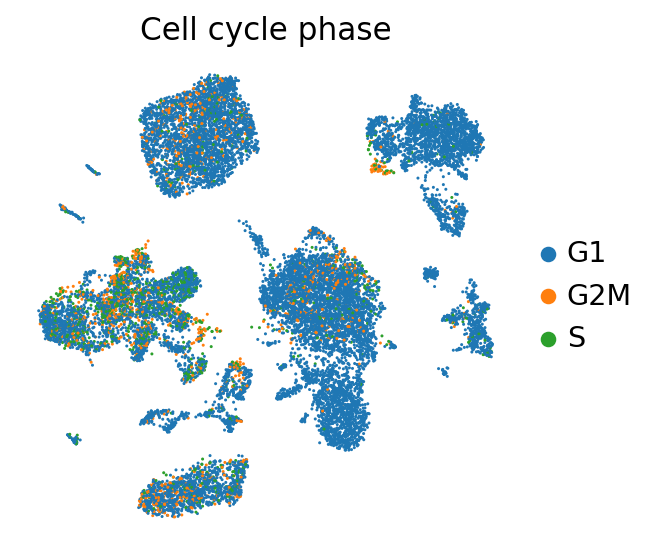

In [15]:
# 使用UMAP结果和细胞周期阶段进行可视化
sc.pl.umap(
    adata,
    color="phase",
    title="Cell cycle phase",
    palette=["#1f77b4", "#ff7f0e", "#2ca02c"],
    save="-24-细胞周期.pdf",
)

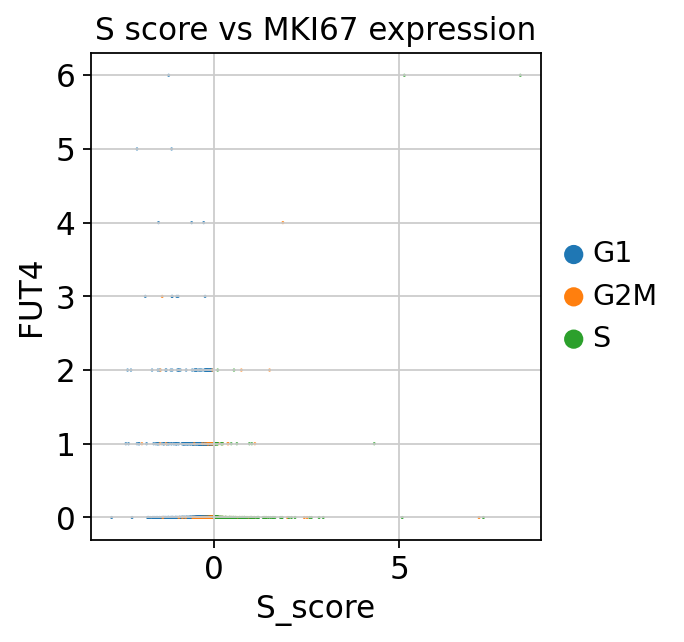

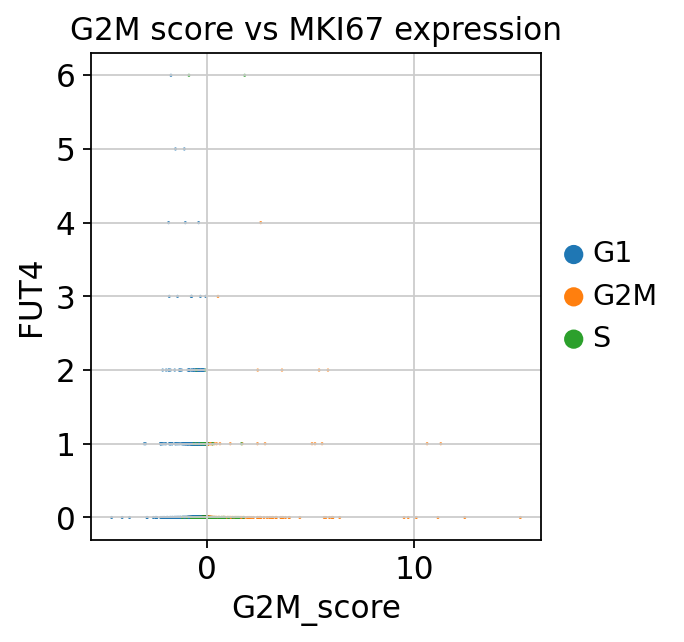

In [14]:
# 看周期和基因的关系
sc.pl.scatter(
    adata,
    x="S_score",
    y="FUT4",  # CD15
    color="phase",
    title="S score vs MKI67 expression",
)
sc.pl.scatter(
    adata,
    x="G2M_score",
    y="FUT4",  # CD15
    color="phase",
    title="G2M score vs MKI67 expression",
)

In [6]:
# 保存你的数据
adata.write_h5ad("anndata_cellcycle.h5ad")